In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv('../data/train.csv/train.csv')
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [3]:
churn_rate_by_tenure = df.groupby('Tenure')[['Exited']].mean()
churn_rate_by_tenure = churn_rate_by_tenure * 100
churn_rate_by_tenure

,Exited
Tenure,
0,25.484322
1,22.613365
2,19.484622
3,22.910403
4,22.638715
5,22.006023
6,19.877386
7,18.759124
8,19.794521


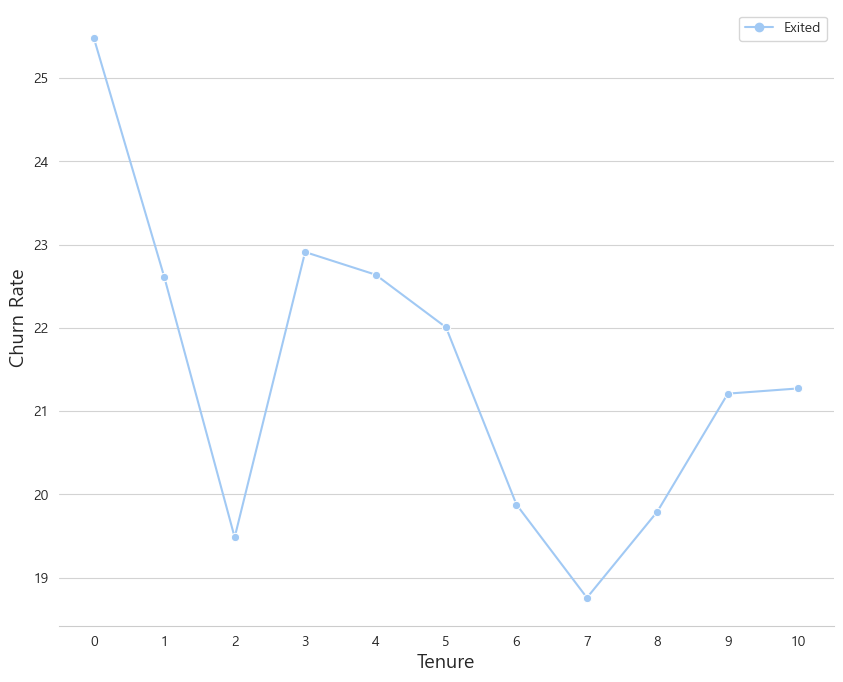

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax0 = sns.lineplot(data=churn_rate_by_tenure, markers=True, palette='pastel', ax=ax)
ax0.set_xlabel('Tenure', fontsize=14)
ax0.set_ylabel('Churn Rate', fontsize=14)
ax0.set_xticks(range(11))

ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.spines['right'].set_visible(False)

plt.grid(False)

ax0.grid(axis='y', which='major', color='lightgray')
ax0.grid(axis='y', which='minor', ls=':')

plt.show()

- 0년차 신규고객의 이탈률이 가장 높음
    - 신규고객이 서비스나 상품에 대한 기대치를 충족하지 못했거나 경쟁은행으로 이탈했을 가능성 있음
    - 신규고객의 초기 경험을 개선
- 1에서 7년차 사이의 고객그룹은 상대적으로 낮은 이탈률을 보임
    - 거래 기간이 길어질수록 이탈률이 낮아지고 충성도가 높아지는 것을 의미
- 8, 9, 10년차에는 이탈률이 다시 증가
    - 거래 기간 길어질수록 이탈률이 낮아지는 일반적인 경향과 다름
    - 특정 시점부터는 고객이 다른 은행의 더 나은 조건이나 서비스에 끌릴 수 있음
    - 고객들의 상황변화(ex.은퇴, 가정 형성)에 따른 영향일 수도 있음
    - 하지만, 여전히 5년차 이하 고객들의 이타률보다는 낮은 수치

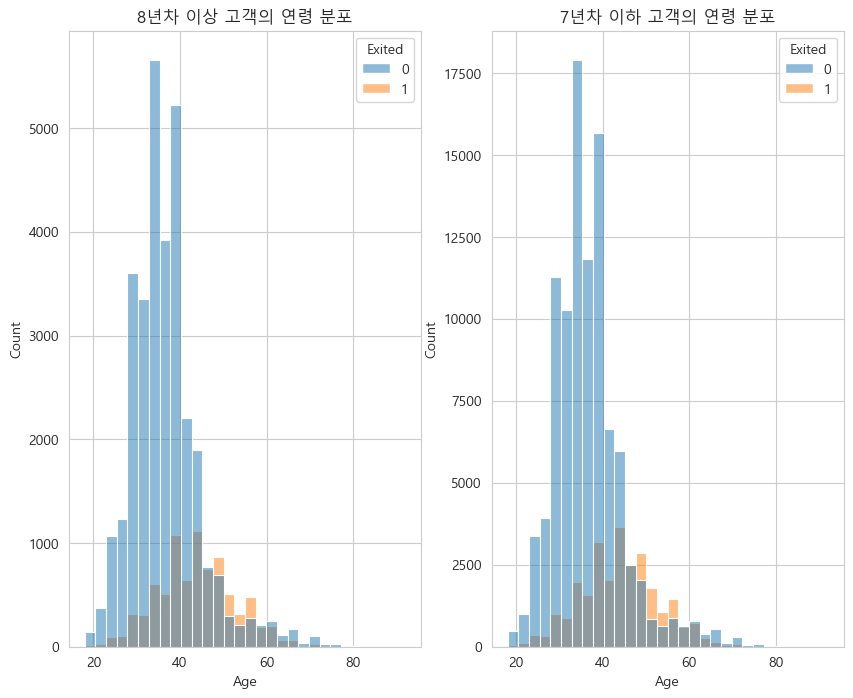

In [4]:
df_over_7 = df[df['Tenure'] > 7]
df_under_7 = df[df['Tenure'] <= 7]

fig, ax = plt.subplots(1, 2, figsize=(10, 8))
sns.histplot(x='Age', hue='Exited', data=df_over_7, bins=30, ax=ax[0])
sns.histplot(x='Age', hue='Exited', data=df_under_7, bins=30, ax=ax[1])
ax[0].set_title('8년차 이상 고객의 연령 분포')
ax[1].set_title('7년차 이하 고객의 연령 분포')
plt.show()

In [5]:
df_over_7.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,40138.000000,4.013800e+04,40138.000000,40138.000000,40138.000000,40138.000000,40138.000000,40138.000000,40138.000000,40138.000000,40138.000000
mean,82225.585007,1.569235e+07,656.549255,38.082524,8.710723,55597.138519,1.552494,0.756366,0.493672,112594.699950,0.206014
std,47603.269736,7.124136e+04,79.998241,8.820640,0.707137,62842.177060,0.546101,0.429280,0.499966,50220.876209,0.404446
min,2.000000,1.556570e+07,350.000000,18.000000,8.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,40826.250000,1.563359e+07,598.000000,32.000000,8.000000,0.000000,1.000000,1.000000,0.000000,74849.460000,0.000000
50%,82091.000000,1.569070e+07,659.000000,37.000000,9.000000,0.000000,2.000000,1.000000,0.000000,117916.630000,0.000000
75%,123517.000000,1.575691e+07,710.000000,42.000000,9.000000,120105.387500,2.000000,1.000000,1.000000,154767.340000,0.000000
max,165028.000000,1.581569e+07,850.000000,92.000000,10.000000,238387.560000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [6]:
df_under_7.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,124896.000000,1.248960e+05,124896.000000,124896.000000,124896.000000,124896.000000,124896.000000,124896.000000,124896.000000,124896.000000,124896.000000
mean,82609.991753,1.569189e+07,656.423881,38.139824,3.834374,55439.826838,1.555086,0.753179,0.499087,112568.434766,0.213394
std,47653.403415,7.144795e+04,80.137383,8.882108,2.112156,62809.986952,0.547492,0.431164,0.500001,50316.178230,0.409705
min,0.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41408.500000,1.563300e+07,597.000000,32.000000,2.000000,0.000000,1.000000,1.000000,0.000000,74580.800000,0.000000
50%,82662.000000,1.569013e+07,659.000000,37.000000,4.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123858.500000,1.575668e+07,710.000000,42.000000,6.000000,119852.010000,2.000000,1.000000,1.000000,155495.630000,0.000000
max,165033.000000,1.581569e+07,850.000000,92.000000,7.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


- 8년차 이상부터 고객의 이탈률이 높아지는 것이 은퇴, 노령화에 따른 영향일 것으로 예상하고 그룹을 나누어 분석해봤으나 그룹간 차이는 보이지 않음
- 오랜 시간 동일한 서비스나 제품을 경험한 후, 고객은 새로운 경험을 원할 수 있음
- 경쟁 은행들이 타행 거래 고객을 유치하기 위해 가입 인센티브나 프로모션을 제공할 수 있음

In [7]:
df['tenure_age_ratio'] = df['Tenure'] / df['Age']
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,tenure_age_ratio
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,0.090909
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,0.030303
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,0.250000
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0.058824
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,0.151515


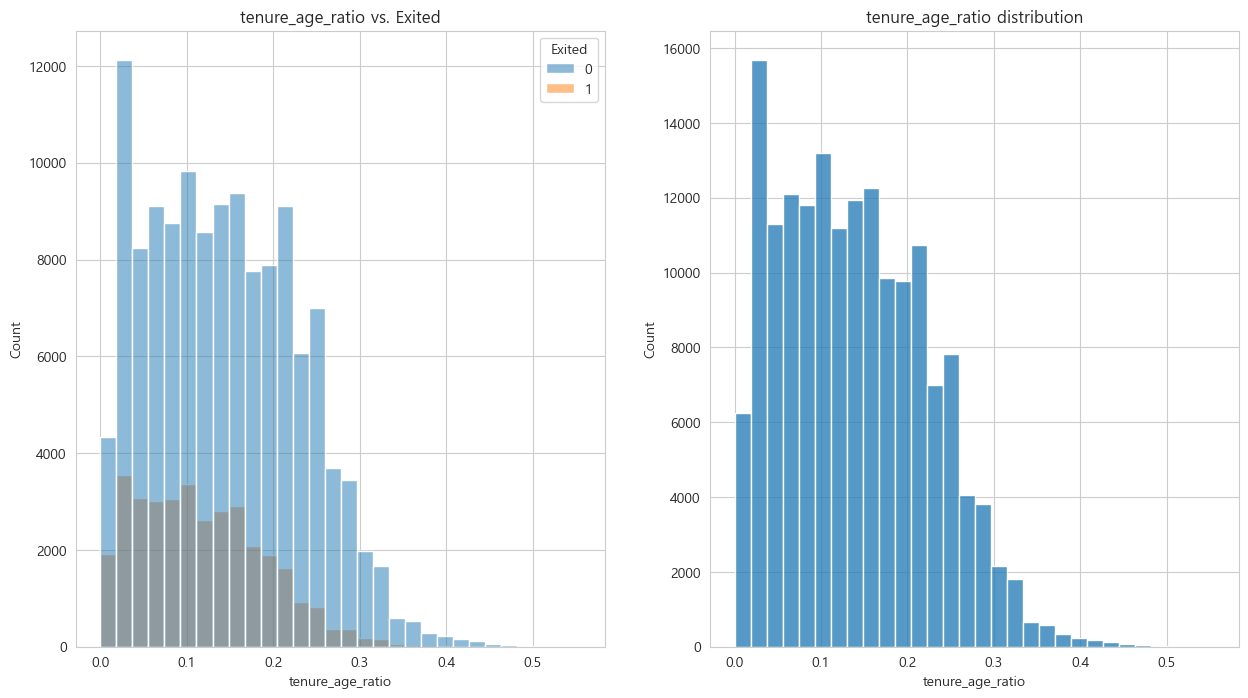

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.histplot(data=df, x='tenure_age_ratio', hue='Exited', bins=30, ax=ax[0])
ax[0].set_title('tenure_age_ratio vs. Exited')
sns.histplot(data=df, x='tenure_age_ratio', bins=30, ax=ax[1])
ax[1].set_title('tenure_age_ratio distribution')
plt.show()

In [9]:
df['tenure_age_ratio'].describe()

count    165034.000000
mean          0.138624
std           0.085213
min           0.000000
25%           0.068182
50%           0.131579
75%           0.200000
max           0.555556
Name: tenure_age_ratio, dtype: float64

- 젊은 나이에 오랜 거래 기간을 가진 고객은 이탈률이 낮음. 은행과의 관계가 생애 초기 단계에서 잘 형성될 경우, 고객의 충성도가 높아질 수 있음
- 대다수의 고객은 낮은 'tenure_age_ratio'를 갖고 있음. 많은 고객들이 은행과의 거래 기간이 짧거나, 나이에 비해 늦게 은행과의 관계가 시작됐음을 의미

# Balance

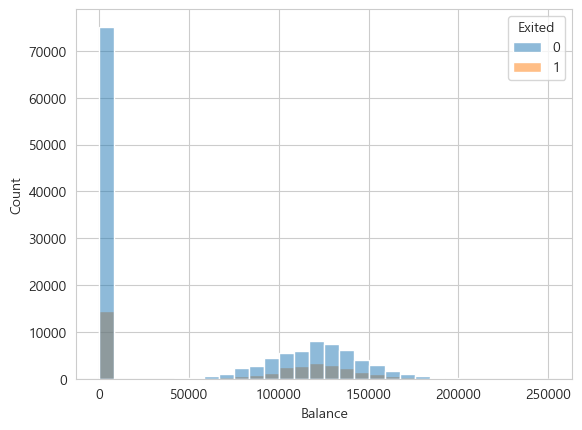

In [10]:
sns.histplot(data=df, x='Balance', hue='Exited', bins=30)
plt.show()

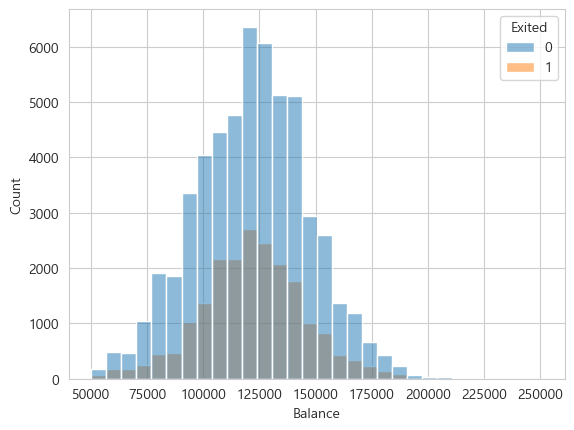

In [11]:
sns.histplot(data=df[df['Balance']>50000], x='Balance', hue='Exited', bins=30)
plt.show()

In [12]:
df[(df['Balance'] > 0) & (df['Balance'] < 50000)]

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,tenure_age_ratio
528,528,15742404,Calabresi,743,Germany,Male,38.0,5,38848.19,2,1.0,0.0,38308.34,0,0.131579
2886,2886,15660147,Dore,493,Spain,Male,32.0,8,46161.18,2,1.0,1.0,79577.40,0,0.250000
4248,4248,15702541,Mironov,724,Germany,Female,29.0,7,13898.30,1,0.0,0.0,189678.70,0,0.241379
4747,4747,15713774,Chikwendu,616,Spain,Female,46.0,1,12459.19,1,0.0,0.0,156787.34,0,0.021739
5025,5025,15697028,Ting,694,Spain,Male,33.0,0,40685.92,1,1.0,1.0,88947.56,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159956,159956,15576124,Muravyova,582,France,Male,41.0,1,40488.76,1,1.0,1.0,128528.83,1,0.024390
162276,162276,15791172,Yeh,672,Germany,Female,21.0,1,35741.69,1,1.0,0.0,142977.05,0,0.047619
163667,163667,15750867,Burns,649,Germany,Male,36.0,2,45022.23,1,1.0,1.0,173495.77,1,0.055556
164056,164056,15606841,Hsia,517,France,Male,50.0,2,43772.66,3,1.0,0.0,187756.24,1,0.040000


In [13]:
df['wealth'] = pd.cut(df['Balance'], [0, 50000, 100000, 150000, 200000,np.inf], 
                      labels=['Low Balance', 'Moderate Balance', 'Comfortable Balance', 'Hight', 'Very High'], right=False)
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,tenure_age_ratio,wealth
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,0.090909,Low Balance
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,0.030303,Low Balance
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,0.250000,Low Balance
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0.058824,Comfortable Balance
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,0.151515,Low Balance


In [14]:
wealth_count = df['wealth'].value_counts().to_frame()
wealth_count

,count
wealth,
Low Balance,89853
Comfortable Balance,51991
Moderate Balance,14216
Hight,8842
Very High,132


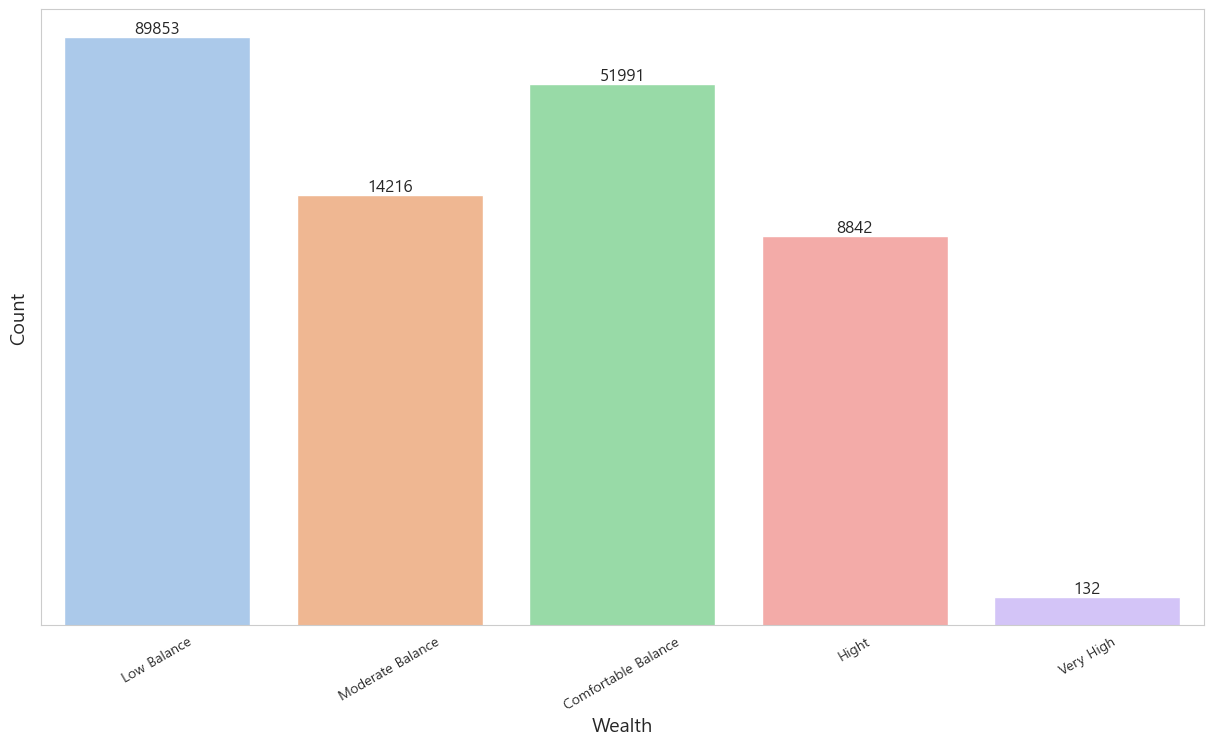

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
ax0 = sns.barplot(x=wealth_count.index, y=wealth_count['count'], log=True, palette='pastel')
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=30)
ax0.set_xlabel('Wealth', fontsize=14)
ax0.set_ylabel('Count', fontsize=14)
ax0.set_yticks([])
ax0.bar_label(ax0.containers[0], label_type='edge', fontsize=12)
plt.show()

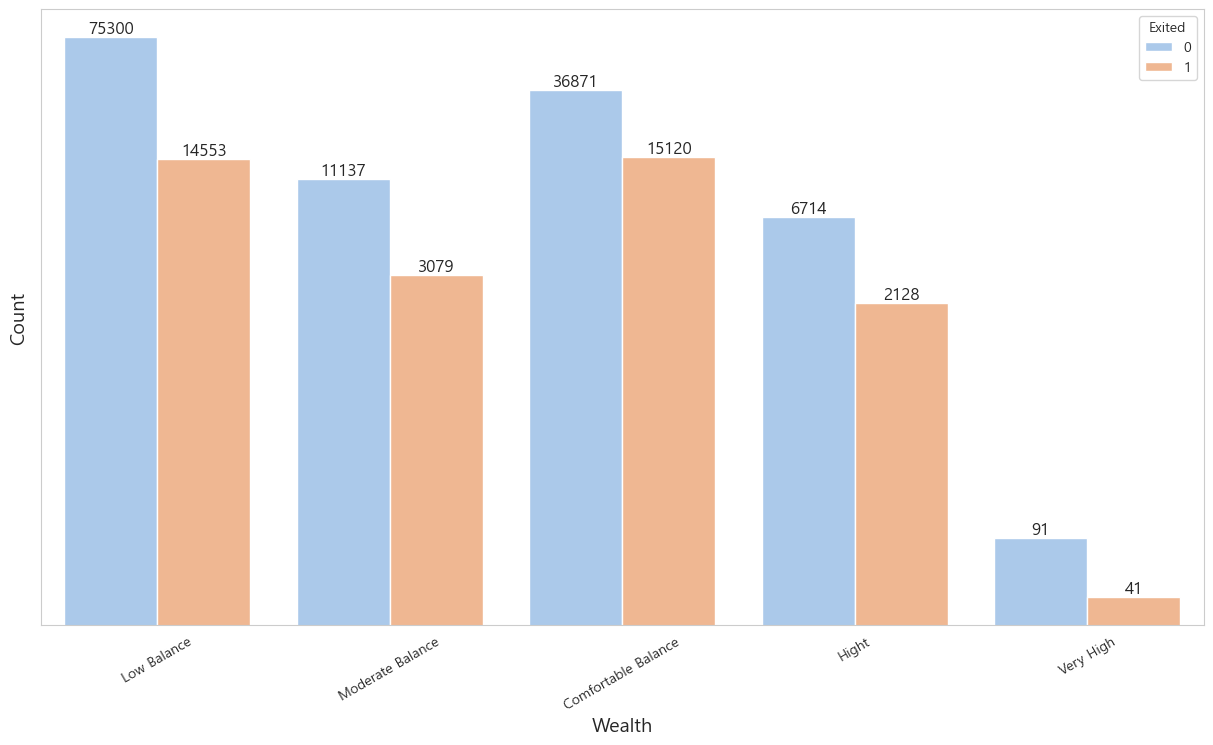

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
ax0 = sns.countplot(data=df, x='wealth', hue='Exited', palette='pastel', log=True)
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=30)
ax0.set_xlabel('Wealth', fontsize=14)
ax0.set_ylabel('Count', fontsize=14)
ax0.set_yticks([])
ax0.bar_label(ax0.containers[0], label_type='edge', fontsize=12)
ax0.bar_label(ax0.containers[1], label_type='edge', fontsize=12)
plt.show()

In [17]:
df.groupby('wealth')['Exited'].mean()

wealth
Low Balance            0.161965
Moderate Balance       0.216587
Comfortable Balance    0.290820
Hight                  0.240670
Very High              0.310606
Name: Exited, dtype: float64

In [18]:
df['Balance'].describe()

count    165034.000000
mean      55478.086689
std       62817.663278
min           0.000000
25%           0.000000
50%           0.000000
75%      119939.517500
max      250898.090000
Name: Balance, dtype: float64

In [19]:
len(df[df['Balance'] == 0]) / len(df)

0.5432092780881516

- 'Low Balance'와 'Comfortable Balance' 그룹의 이탈률이 평균과 큰 차이를 보임
- Low Balance : 은행 서비스에 의존도, 필요성이 높지 않은 고객. 타행에서도 유치로 인한 이득이 적음
- 54%의 고객들의 잔고가 0이고 이들의 이탈률(16%)이 상대적으로 낮음.
- 높은 잔고가 있는 고객들은 은행 서비스에 대한 의존도가 높고, 은행 서비스의 질, 이자율, 수수료 등에 민감할 수 있음
    - 잔액이 높은 고객들은 더 복잡하고 다양한 금융 필요를 가지고 있을 수 있음
    - 경쟁 은행에서도 높은 잔액을 가진 고객에 대한 유치 요인이 큼
> 은행 입장은 높은 잔액을 가진 고객들을 유지하기 위한 방안을 마련해야 함

> 다수를 차지하고 있는 고객들을 실질적 은행 이용자로 전환하기 위한 방안이 필요함